In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
from collections import Counter

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shubhamboral","key":"4798735009f62a12ac85096c558af2c8"}'}

**Dataset Exploration and Understanding**


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

1. Download and Extract the Dataset


In [ ]:
!kaggle datasets download -d orvile/gastric-cancer-histopathology-tissue-image-dataset

Dataset URL: https://www.kaggle.com/datasets/orvile/gastric-cancer-histopathology-tissue-image-dataset
License(s): Attribution 4.0 International (CC BY 4.0)


In [ ]:
!unzip gastric-cancer-histopathology-tissue-image-dataset.zip -d gastric_data

Streaming output truncated to the last 5000 lines.
  inflating: gastric_data/HMU-GC-HE-30K/all_image/STR/STR_3496.png  
  inflating: gastric_data/HMU-GC-HE-30K/all_image/STR/STR_3497.png  
  inflating: gastric_data/HMU-GC-HE-30K/all_image/STR/STR_3498.png  
  inflating: gastric_data/HMU-GC-HE-30K/all_image/STR/STR_3499.png  
  inflating: gastric_data/HMU-GC-HE-30K/all_image/STR/STR_35.png  
  inflating: gastric_data/HMU-GC-HE-30K/all_image/STR/STR_350.png  
  inflating: gastric_data/HMU-GC-HE-30K/all_image/STR/STR_3500.png  
  inflating: gastric_data/HMU-GC-HE-30K/all_image/STR/STR_3501.png  
  inflating: gastric_data/HMU-GC-HE-30K/all_image/STR/STR_3502.png  
  inflating: gastric_data/HMU-GC-HE-30K/all_image/STR/STR_3503.png  
  inflating: gastric_data/HMU-GC-HE-30K/all_image/STR/STR_3504.png  
  inflating: gastric_data/HMU-GC-HE-30K/all_image/STR/STR_3505.png  
  inflating: gastric_data/HMU-GC-HE-30K/all_image/STR/STR_3506.png  
  inflating: gastric_data/HMU-GC-HE-30K/all_image/STR/S

2. Examine Folder Structure and Class Distribution

In [ ]:
import os

dataset_path = '/content/gastric_data'

# Print folder structure and class distribution
for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 2 * (level + 1)
    for f in files[:5]:  # showing first 5 files in each folder
        print(f'{subindent}{f}')


gastric_data/
  HMU-GC-Clinical.csv
  HMU-GC-HE-30K/
    all_image/
      ADI/
        ADI_3102.png
        ADI_3083.png
        ADI_3748.png
        ADI_1574.png
        ADI_2009.png
      TUM/
        TUM_170.png
        TUM_2651.png
        TUM_3045.png
        TUM_3655.png
        TUM_579.png
      LYM/
        LYM_3522.png
        LYM_2978.png
        LYM_319.png
        LYM_1304.png
        LYM_292.png
      MUC/
        MUC_1157.png
        MUC_480.png
        MUC_1693.png
        MUC_39.png
        MUC_2013.png
      STR/
        STR_2407.png
        STR_2636.png
        STR_1235.png
        STR_2045.png
        STR_3272.png
      DEB/
        DEB_3817.png
        DEB_2886.png
        DEB_1059.png
        DEB_2245.png
        DEB_1303.png
      NOR/
        NOR_3792.png
        NOR_1731.png
        NOR_452.png
        NOR_596.png
        NOR_2737.png
      MUS/
        MUS_2000.png
        MUS_2156.png
        MUS_2373.png
        MUS_2337.png
        MUS_1479.png


3. Display sample images from each class.


In [ ]:
import os
import pandas as pd

def count_images_in_subfolders(root_path):
    data = []
    for subdir, dirs, files in os.walk(root_path):
        image_files = [f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        if image_files:
            relative_path = os.path.relpath(subdir, root_path)
            data.append({'Folder': relative_path, 'Image Count': len(image_files)})
    return pd.DataFrame(data)

df = count_images_in_subfolders('gastric_data')
df_sorted = df.sort_values(by='Image Count', ascending=False)
df_sorted.reset_index(drop=True, inplace=True)
df_sorted


,Folder,Image Count
0,HMU-GC-HE-30K/all_image/ADI,3887
1,HMU-GC-HE-30K/all_image/TUM,3887
2,HMU-GC-HE-30K/all_image/LYM,3887
3,HMU-GC-HE-30K/all_image/MUC,3887
4,HMU-GC-HE-30K/all_image/STR,3887
5,HMU-GC-HE-30K/all_image/DEB,3887
6,HMU-GC-HE-30K/all_image/NOR,3887
7,HMU-GC-HE-30K/all_image/MUS,3887


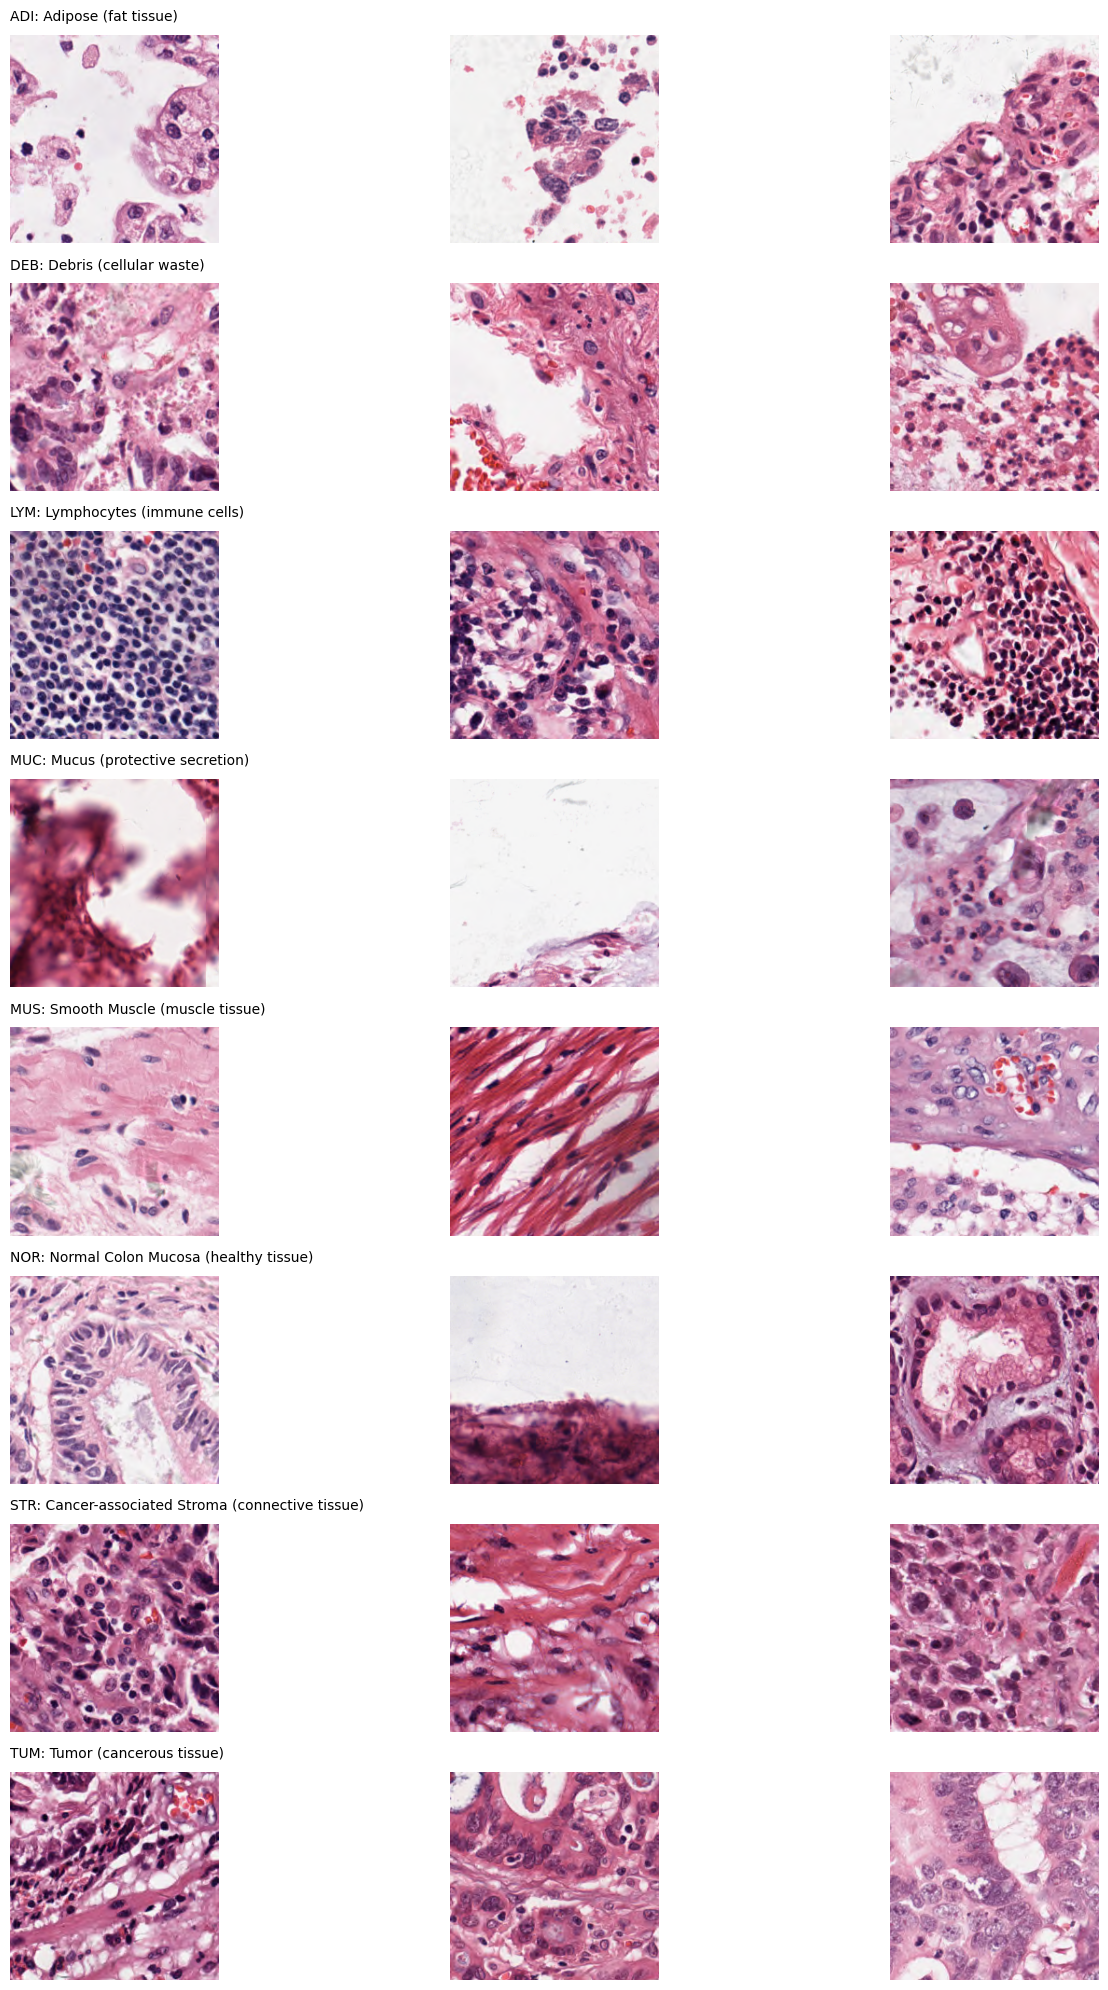

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

root_path = "gastric_data/HMU-GC-HE-30K/all_image"

# Mapping from folder names to full descriptions
folder_descriptions = {
    "ADI": "ADI: Adipose (fat tissue)",
    "DEB": "DEB: Debris (cellular waste)",
    "LYM": "LYM: Lymphocytes (immune cells)",
    "MUC": "MUC: Mucus (protective secretion)",
    "MUS": "MUS: Smooth Muscle (muscle tissue)",
    "NOR": "NOR: Normal Colon Mucosa (healthy tissue)",
    "STR": "STR: Cancer-associated Stroma (connective tissue)",
    "TUM": "TUM: Tumor (cancerous tissue)"
}

class_folders = sorted([f for f in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, f))])

n_samples = 3
fig, axs = plt.subplots(len(class_folders), n_samples, figsize=(15, 2.5 * len(class_folders)))

for row, folder in enumerate(class_folders):
    folder_path = os.path.join(root_path, folder)
    images = [img for img in os.listdir(folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))][:n_samples]

    for col in range(n_samples):
        img_path = os.path.join(folder_path, images[col])
        img = Image.open(img_path)
        axs[row, col].imshow(img)
        axs[row, col].axis('off')

        if col == 0:
            label = folder_descriptions.get(folder, folder)
            axs[row, col].set_title(label, fontsize=10, loc='left', pad=10)

plt.tight_layout()
plt.show()


4. Identify any class imbalance.

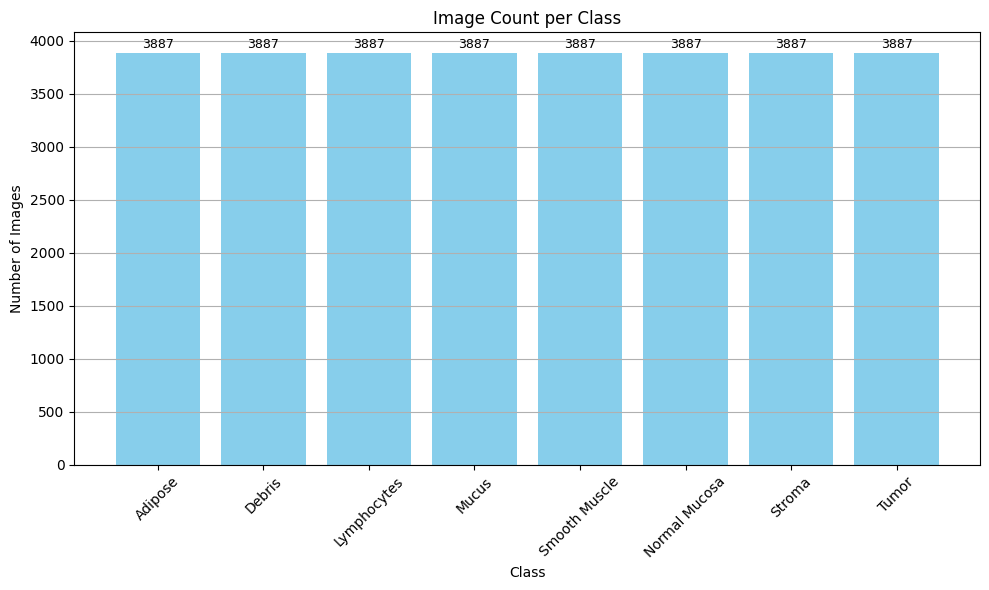

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

root_path = "gastric_data/HMU-GC-HE-30K/all_image"

class_counts = {}
for class_folder in sorted(os.listdir(root_path)):
    folder_path = os.path.join(root_path, class_folder)
    if os.path.isdir(folder_path):
        count = len([img for img in os.listdir(folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))])
        class_counts[class_folder] = count

df_counts = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Image Count'])

# Add full class descriptions
class_labels = {
    "ADI": "Adipose",
    "DEB": "Debris",
    "LYM": "Lymphocytes",
    "MUC": "Mucus",
    "MUS": "Smooth Muscle",
    "NOR": "Normal Mucosa",
    "STR": "Stroma",
    "TUM": "Tumor"
}
df_counts['Label'] = df_counts['Class'].map(class_labels)

plt.figure(figsize=(10, 6))
bars = plt.bar(df_counts['Label'], df_counts['Image Count'], color='skyblue')
plt.title("Image Count per Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.grid(axis='y')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, yval, ha='center', fontsize=9)

plt.tight_layout()
plt.show()

**Image Preprocessing and Setup**

1. Resize images to a consistent size (e.g., 150x150).

In [ ]:
root_path = "gastric_data/HMU-GC-HE-30K/all_image"

size_counter = Counter()

for class_folder in sorted(os.listdir(root_path)):
    folder_path = os.path.join(root_path, class_folder)
    if os.path.isdir(folder_path):
        image_files = [img for img in os.listdir(folder_path) if img.lower().endswith(('.jpg', '.png', '.jpeg'))]
        for img_name in image_files:
            img_path = os.path.join(folder_path, img_name)
            try:
                with Image.open(img_path) as img:
                    size_counter[img.size] += 1
            except Exception as e:
                print(f"Error reading {img_path}: {e}")

for size, count in size_counter.items():
    print(f"Size {size}: {count} images")

Size (224, 224): 31096 images


The images in this dataset already have a consistent size of 224×224 pixels,
which is a standard input size for many convolutional neural networks (CNNs).
Therefore, resizing is not necessary in this case, and the images can be used
directly for model training and evaluation.



2. Normalize pixel values to the range [0, 1].

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)  # Normalizes pixel values to [0, 1]

train_generator = datagen.flow_from_directory(
    'gastric_data/HMU-GC-HE-30K/all_image',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32
)

Found 31096 images belonging to 8 classes.


3. Create training, validation, and test datasets using appropriate data loading utilities.

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Original dataset path
original_dir = "gastric_data/HMU-GC-HE-30K/all_image"
base_dir = "gastric_data/split_data"

# New directories
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Create folders
for split_dir in [train_dir, val_dir, test_dir]:
    os.makedirs(split_dir, exist_ok=True)

# Get class folders
class_names = sorted(os.listdir(original_dir))

# Split data
for class_name in class_names:
    class_path = os.path.join(original_dir, class_name)
    images = os.listdir(class_path)

    train_imgs, temp_imgs = train_test_split(images, test_size=0.30, random_state=42)
    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=0.50, random_state=42)  # 15/15 split

    for split_name, split_imgs in zip(['train', 'val', 'test'], [train_imgs, val_imgs, test_imgs]):
        split_class_dir = os.path.join(base_dir, split_name, class_name)
        os.makedirs(split_class_dir, exist_ok=True)

        for img in split_imgs:
            src = os.path.join(class_path, img)
            dst = os.path.join(split_class_dir, img)
            shutil.copy2(src, dst)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalize pixels to [0, 1]
datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_gen = datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_gen = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 21760 images belonging to 8 classes.
Found 4664 images belonging to 8 classes.
Found 4672 images belonging to 8 classes.


**Building the CNN Model**


1. Design a CNN architecture with layers such as Conv2D, MaxPooling2D, Flatten, Dense, and optional Dropout.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    # Block 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # Block 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Block 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Regularization
    Dropout(0.5),

    # Fully Connected Layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')  # 8 classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Show model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,992 (42.61 MB)

 Trainable params: 11,169,992 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

2. Use a sigmoid activation function for the output layer.


Using a sigmoid activation function in this project would be inappropriate and could degrade model performance due to incorrect problem framing. Softmax should be used for optimal and meaningful predictions in this single-label, multi-class image classification task.

3. Compile the model with binary cross-entropy loss, an optimizer like Adam, and accuracy as a metric.

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

We check here if the images have duplicates in same or differnt folders.

In [ ]:
import os
import hashlib
from collections import defaultdict

from PIL import Image

def hash_image(img_path):
    with Image.open(img_path) as img:
        img = img.convert('RGB')  # Ensure consistent mode
        return hashlib.md5(img.tobytes()).hexdigest()

root_path = "gastric_data/HMU-GC-HE-30K/all_image"
class_folders = sorted([f for f in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, f))])

hash_to_paths = defaultdict(list)

# Generate hash for each image
for folder in class_folders:
    folder_path = os.path.join(root_path, folder)
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(folder_path, filename)
            try:
                img_hash = hash_image(img_path)
                hash_to_paths[img_hash].append(img_path)
            except Exception as e:
                print(f"Error hashing {img_path}: {e}")

# Find duplicate hashes
duplicates = {h: paths for h, paths in hash_to_paths.items() if len(paths) > 1}

print(f"Total pixel-wise duplicate images found across folders: {len(duplicates)}")

# Show a few
for h, paths in list(duplicates.items())[:5]:
    print(f"\nHash: {h}")
    for p in paths:
        print(f"  {p}")

Total pixel-wise duplicate images found across folders: 932

Hash: 3c305a70436a7bf72aef8270e51e1e45
  gastric_data/HMU-GC-HE-30K/all_image/ADI/ADI_3083.png
  gastric_data/HMU-GC-HE-30K/all_image/ADI/ADI_3090.png

Hash: 298d33645c667a957d15f706a61719a6
  gastric_data/HMU-GC-HE-30K/all_image/ADI/ADI_1523.png
  gastric_data/HMU-GC-HE-30K/all_image/ADI/ADI_1534.png
  gastric_data/HMU-GC-HE-30K/all_image/ADI/ADI_1526.png

Hash: 6c540f53c35e80e1ffeeb36f9134fc6e
  gastric_data/HMU-GC-HE-30K/all_image/ADI/ADI_2057.png
  gastric_data/HMU-GC-HE-30K/all_image/ADI/ADI_2062.png

Hash: fb46136f7d5f79fc64c6a8425580144b
  gastric_data/HMU-GC-HE-30K/all_image/ADI/ADI_1032.png
  gastric_data/HMU-GC-HE-30K/all_image/ADI/ADI_1028.png

Hash: 9bac2be0525dbf245eb174224911347b
  gastric_data/HMU-GC-HE-30K/all_image/ADI/ADI_1826.png
  gastric_data/HMU-GC-HE-30K/all_image/ADI/ADI_1828.png


In [ ]:
cross_class_duplicates = {}

for h, paths in duplicates.items():
    class_names = {os.path.basename(os.path.dirname(p)) for p in paths}  # folder names
    if len(class_names) > 1:
        cross_class_duplicates[h] = paths

print(f"Total duplicates across *different* class folders: {len(cross_class_duplicates)}")

# Show a few if found
for h, paths in list(cross_class_duplicates.items())[:5]:
    print(f"\nHash: {h}")
    for p in paths:
        print(f"  {p}")

Total duplicates across *different* class folders: 0


We detected and analyzed 932 pixel-wise duplicate images within the dataset. These duplicates occurred only within the same class folders and therefore do not introduce any labeling errors. Given their relatively small proportion (~3%) and intra-class consistency, they were retained for model training without significant concern for performance impact.

**Model Training and Monitoring**


1. Train the model on the training set and validate on the validation set.

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

# Dataset path
dataset_path = "gastric_data/HMU-GC-HE-30K/all_image"

# Load the training and validation datasets (80% train, 20% val)
train_val_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="both",
    seed=42,
    image_size=(224, 224),
    batch_size=16,
    label_mode='categorical'  # for softmax + categorical_crossentropy
)

train_ds = train_val_ds[0]
val_ds = train_val_ds[1]

# Optionally create a separate test set (10% from full, or manually)
# For now, we can treat val_ds as our "test" later if needed

# Normalize pixel values [0, 255] -> [0, 1]
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Performance boosts
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

Found 31096 files belonging to 8 classes.
Using 24877 files for training.
Using 6219 files for validation.


2. Monitor training and validation loss and accuracy.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Stop training when validation loss stops improving
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

3. Implement callbacks such as EarlyStopping and ModelCheckpoint to optimize training.


In [ ]:
model_checkpoint = ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

In [ ]:
callbacks = [early_stopping, model_checkpoint]

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=callbacks
)

Epoch 1/20
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3900 - loss: 1.5566
Epoch 1: val_loss improved from inf to 1.40549, saving model to best_model.keras
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.3900 - loss: 1.5566 - val_accuracy: 0.4284 - val_loss: 1.4055
Epoch 2/20
1554/1555 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4481 - loss: 1.4048
Epoch 2: val_loss improved from 1.40549 to 1.33548, saving model to best_model.keras
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 148s 57ms/step - accuracy: 0.4481 - loss: 1.4048 - val_accuracy: 0.4842 - val_loss: 1.3355
Epoch 3/20
1554/1555 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4811 - loss: 1.3212
Epoch 3: val_loss did not improve from 1.33548
1555/1555 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.4811 - loss: 1.3212 - val_accuracy: 0.4700 - val_loss: 1.3627
Epoch 4/20
1554/1555 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5018 - loss: 1.2713
Epoch 4: val_loss improved from 1.33548 to 1.26604, saving model to

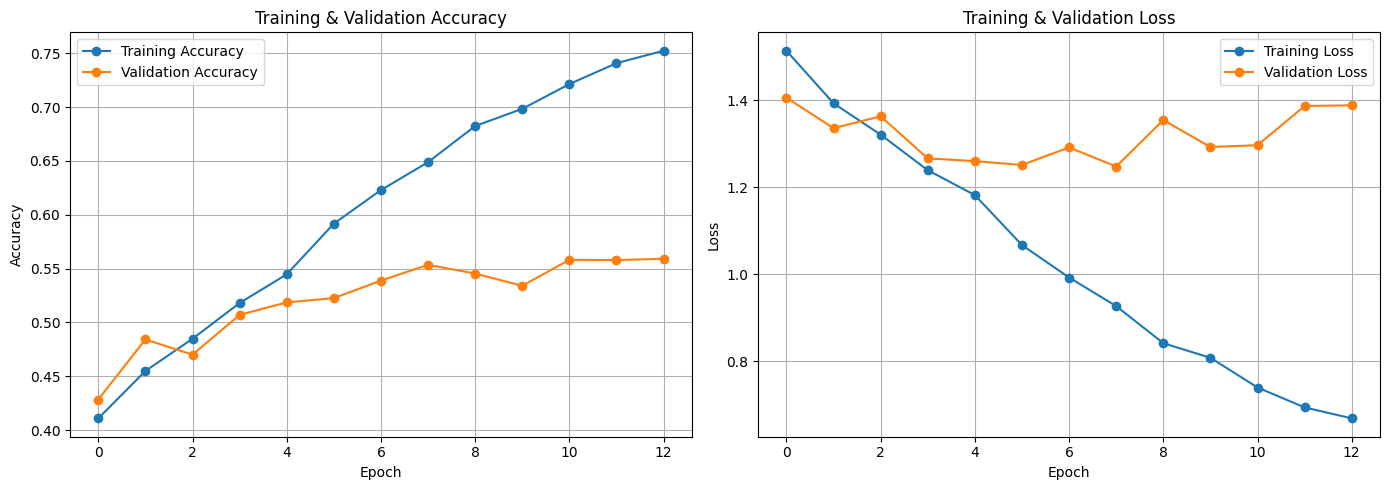

In [ ]:
import matplotlib.pyplot as plt

# Plotting training & validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(14, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Model Evaluation**

1. Evaluate the model on the test set.


2.Calculate performance metrics: accuracy, precision, recall, and F1-score.

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions and true labels
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

# Print classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, digits=4))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━

3.Generate a confusion matrix and interpret the results.

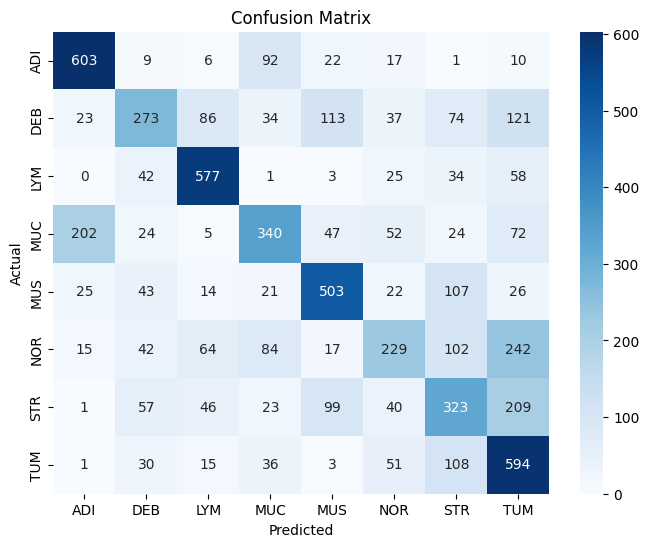

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are defined from the previous cell
cm = confusion_matrix(y_true, y_pred)  # Calculate the confusion matrix

class_names = val_gen.class_indices  # Get class names from the generator
class_names = list(class_names.keys())  # Convert to list for heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

1.Identify and display misclassified images (show a few examples).



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import image_dataset_from_directory

# Assuming dataset_path is the path to your image dataset
dataset_path = "gastric_data/HMU-GC-HE-30K/all_image"

# Create a test dataset (e.g., 10% of the data)
test_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.1,  # Adjust split ratio if needed
    subset="validation",
    seed=42,
    image_size=(224, 224),
    batch_size=16,
    label_mode='categorical'
)

# Normalize pixel values
normalization_layer = tf.keras.layers.Rescaling(1./255)
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# Performance boost
AUTOTUNE = tf.data.AUTOTUNE
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

# ... (Rest of your code for displaying misclassified images) ...

Found 31096 files belonging to 8 classes.
Using 3109 files for validation.


In [ ]:
from collections import Counter

# Build confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

# For each class, compute FP and FN
fp = cm.sum(axis=0) - np.diag(cm)
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)

analysis = []
for i in range(len(cm)):
    analysis.append({
        'class': i,
        'false_positives': fp[i],
        'false_negatives': fn[i],
        'support': cm.sum(axis=1)[i]
    })

import pandas as pd
df_error = pd.DataFrame(analysis)
display(df_error)

""
